Saving Dataset New.xlsx to Dataset New (4).xlsx
Mean Squared Error: 3.1649160015299813
R-squared: 0.44311375034348255


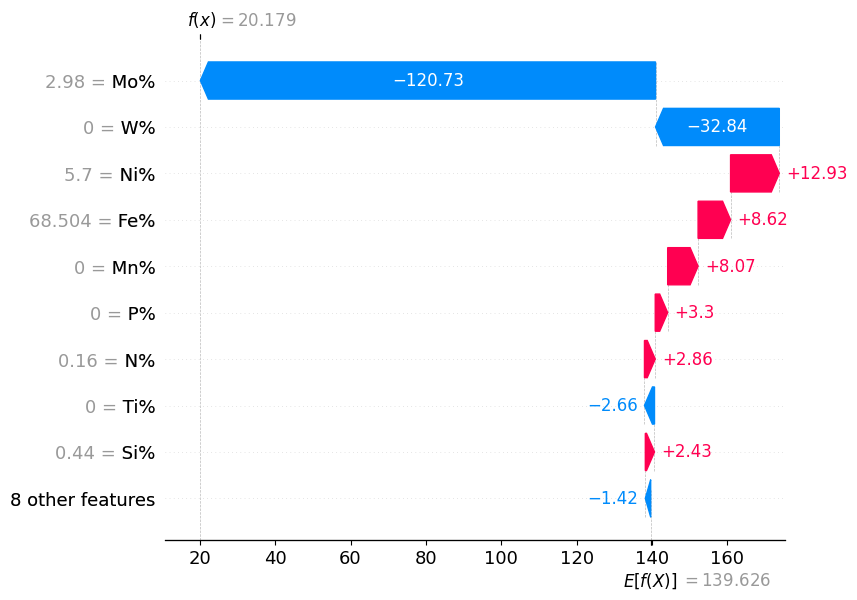

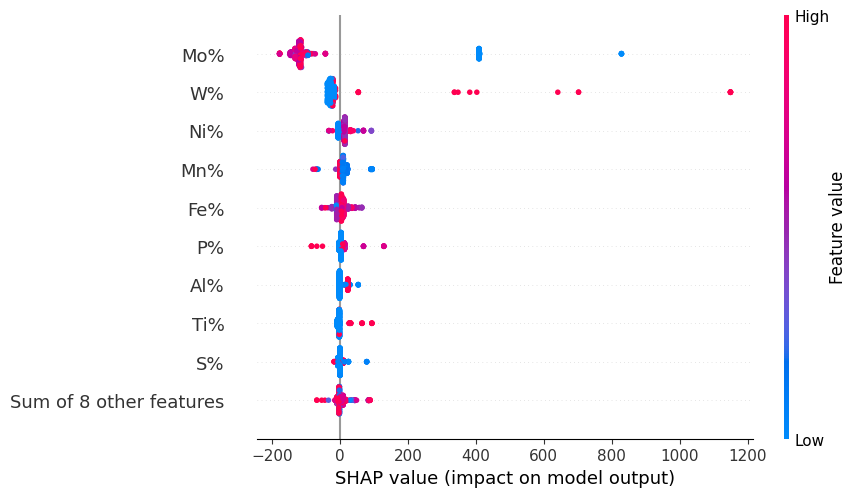

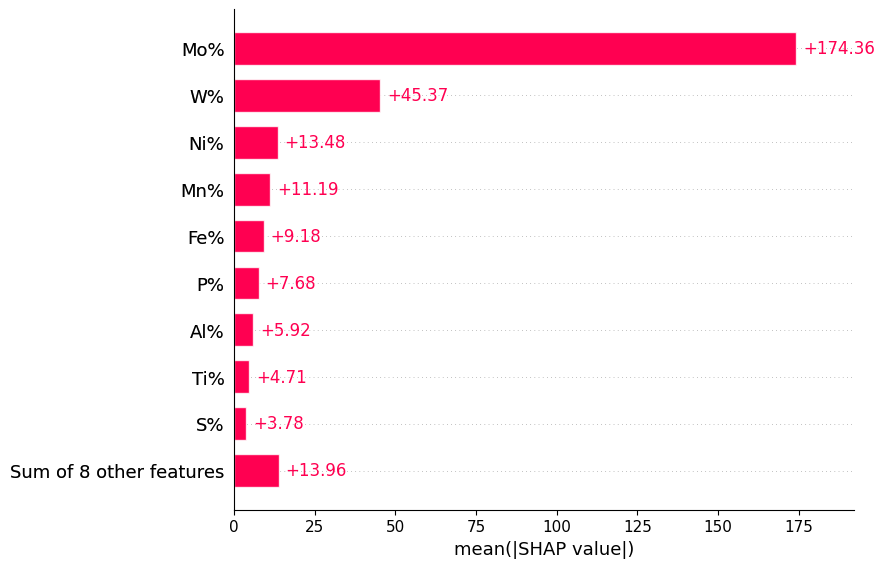

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression, mutual_info_regression
from scipy.stats import pearsonr, spearmanr, kendalltau
import shap

# Load the dataset
from google.colab import files
uploaded = files.upload()
data_set=uploaded
import pandas as pd
import io

filename = list(uploaded.keys())[0]  # Get the filename from the dictionary

# Read the CSV data into a pandas DataFrame, specifying the encoding
# 'latin-1' is used here,
# such as 'ISO-8859-1', 'cp1252', etc. if this still fails.
df = pd.read_excel(io.BytesIO(uploaded[filename]))


# Drop the 'Other%' column

data=df


# Calculate the cooling rate


# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values using the mean
data.fillna(0, inplace=True)

data.replace([np.inf, -np.inf], np.nan, inplace=True)
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')


# Separate features and target
X = data.drop(columns=['vol% sigma phase formed', 'Type','Onset Time(hrs)','Temperature(c)'])
y = data['Onset Time(hrs)']
X.fillna(0, inplace=True)  # Fill NaN with 0 in X
y.fillna(0, inplace=True)  # Fill NaN with 0 in
y_1 = np.log1p(y)  # Use log1p to handle 0 values





# Perform hypothesis testing for feature selection
alpha = 0.05  # Significance level

# Initialize lists to store significant features based on different criteria
pearson_sig_features = []
f_score_sig_features = []
mi_sig_features = []

for feature in X.columns:
    # Pearson correlation
    corr, p_value = pearsonr(X[feature], y)
    if p_value < alpha:
        pearson_sig_features.append(feature)

    # F-score
    f_statistic, p_value = f_regression(X[[feature]], y)
    if p_value < alpha:
        f_score_sig_features.append(feature)

    # Mutual information
    mi = mutual_info_regression(X[[feature]], y)
    if mi > 0:  # A positive MI indicates some dependency
        mi_sig_features.append(feature)

# Combine all significant features
all_sig_features = list(set(pearson_sig_features + f_score_sig_features + mi_sig_features))

# Split data with selected features
X_train, X_test, y_train, y_test = train_test_split(X[all_sig_features], y_1, test_size=0.2, random_state=42)

# Initialize and train the model
basic_rf = RandomForestRegressor(random_state=42)
basic_rf.fit(X_train, y_train)

# Make predictions
y_pred = basic_rf.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Explain the model's predictions using SHAP
explainer = shap.Explainer(model_rf)
shap_values = explainer(X[all_sig_features])

# Visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

# Visualize the first prediction's explanation (force plot)
shap.plots.force(shap_values[0])

# Visualize the global feature importance
shap.plots.beeswarm(shap_values)

# Visualize the global feature importance (bar plot)
shap.plots.bar(shap_values)

In [6]:
df

,Type,Onset Time(hrs),vol% sigma phase formed,Temperature(c),Fe%,C%,Cr%,Ni%,Mn%,Si%,...,Mo%,Co%,P%,S%,Cu%,W%,Al%,Ti%,Ce%,Nb%
0,DSS,0.1,1,700,68.504,0.016,22.20,5.7,0,0.44,...,2.98,0,0,0,0,0,0,0,0,0
1,DSS,1,5,700,68.504,0.016,22.20,5.7,0,0.44,...,2.98,0,0,0,0,0,0,0,0,0
2,DSS,3,12,700,68.504,0.016,22.20,5.7,0,0.44,...,2.98,0,0,0,0,0,0,0,0,0
3,DSS,5,25,700,68.504,0.016,22.20,5.7,0,0.44,...,2.98,0,0,0,0,0,0,0,0,0
4,DSS,10,38,700,68.504,0.016,22.20,5.7,0,0.44,...,2.98,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,0,193.13,0.57,750,69.660,0.02,15.27,2.04,11.05,0,...,0,0,0,0,0,0,1.96,0,0,0
569,0,157.59,0.31,750,69.660,0.02,15.27,2.04,11.05,0,...,0,0,0,0,0,0,1.96,0,0,0
570,0,122.06,0.18,750,69.660,0.02,15.27,2.04,11.05,0,...,0,0,0,0,0,0,1.96,0,0,0
571,0,93.2,0.05,750,69.660,0.02,15.27,2.04,11.05,0,...,0,0,0,0,0,0,1.96,0,0,0


In [19]:
X.dtypes

,0
Fe%,float64
C%,float64
Cr%,float64
Ni%,float64
Mn%,float64
Si%,float64
N%,float64
Mo%,float64
Co%,float64
P%,float64


In [ ]:
# prompt: data.fill nan(0)

# Fill NaN values with 0 in the 'data' DataFrame
data.fillna(0, inplace=True)


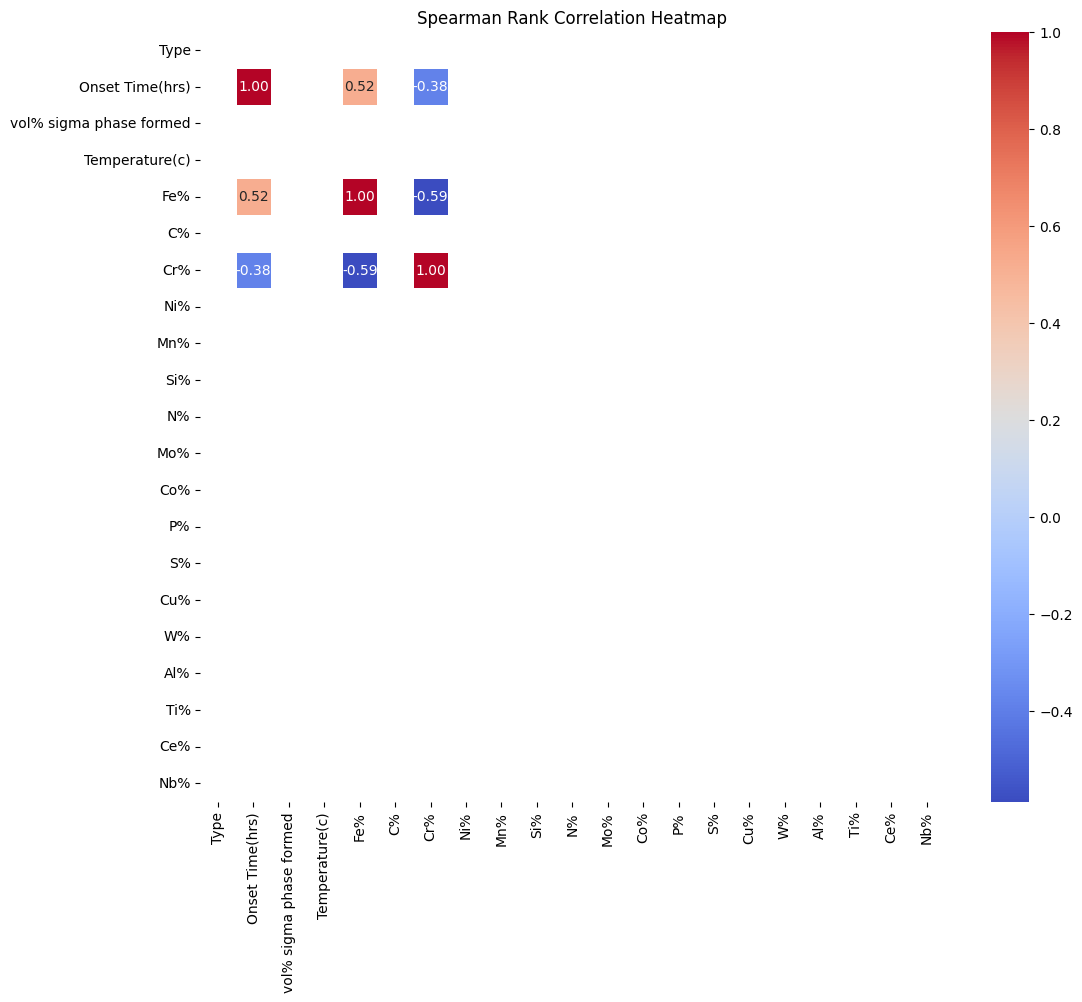

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Assuming 'data' is your DataFrame containing all features and the target
# Select only the numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=['number'])

# Calculate the Spearman rank correlation matrix
correlation_matrix, p_values = spearmanr(numerical_data)

# Convert the correlation matrix to a pandas DataFrame for better readability
correlation_df = pd.DataFrame(correlation_matrix, index=numerical_data.columns, columns=numerical_data.columns)

# Create the heatmap using seaborn
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Rank Correlation Heatmap')
plt.show()

In [32]:
data['log_Onset_Time'] = y_1  # Add y_1 as a new column named 'log_Onset_Time'

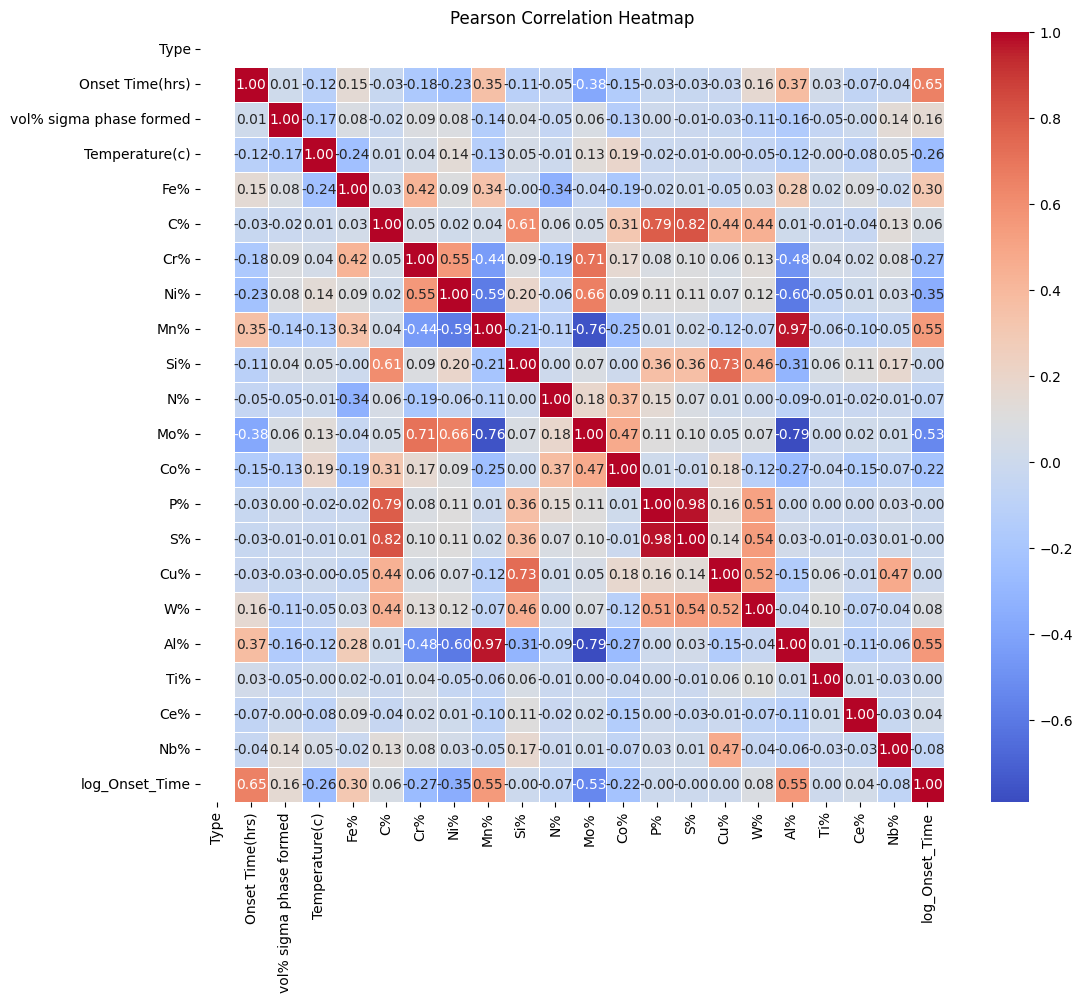

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing all features and the target
# Select only the numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=['number'])

# Calculate the Pearson correlation matrix
correlation_matrix = numerical_data.corr()  # Use .corr() for Pearson correlation

# Create the heatmap using seaborn
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

hyper parameter tuneing my approach is frst find a good set of hyperparameters with baysian then optimise them with random /grid

In [34]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest model
model_rf= RandomForestRegressor(random_state=42)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean Squared Error: 3.1664186278400597
R-squared: 0.44284935409092785


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

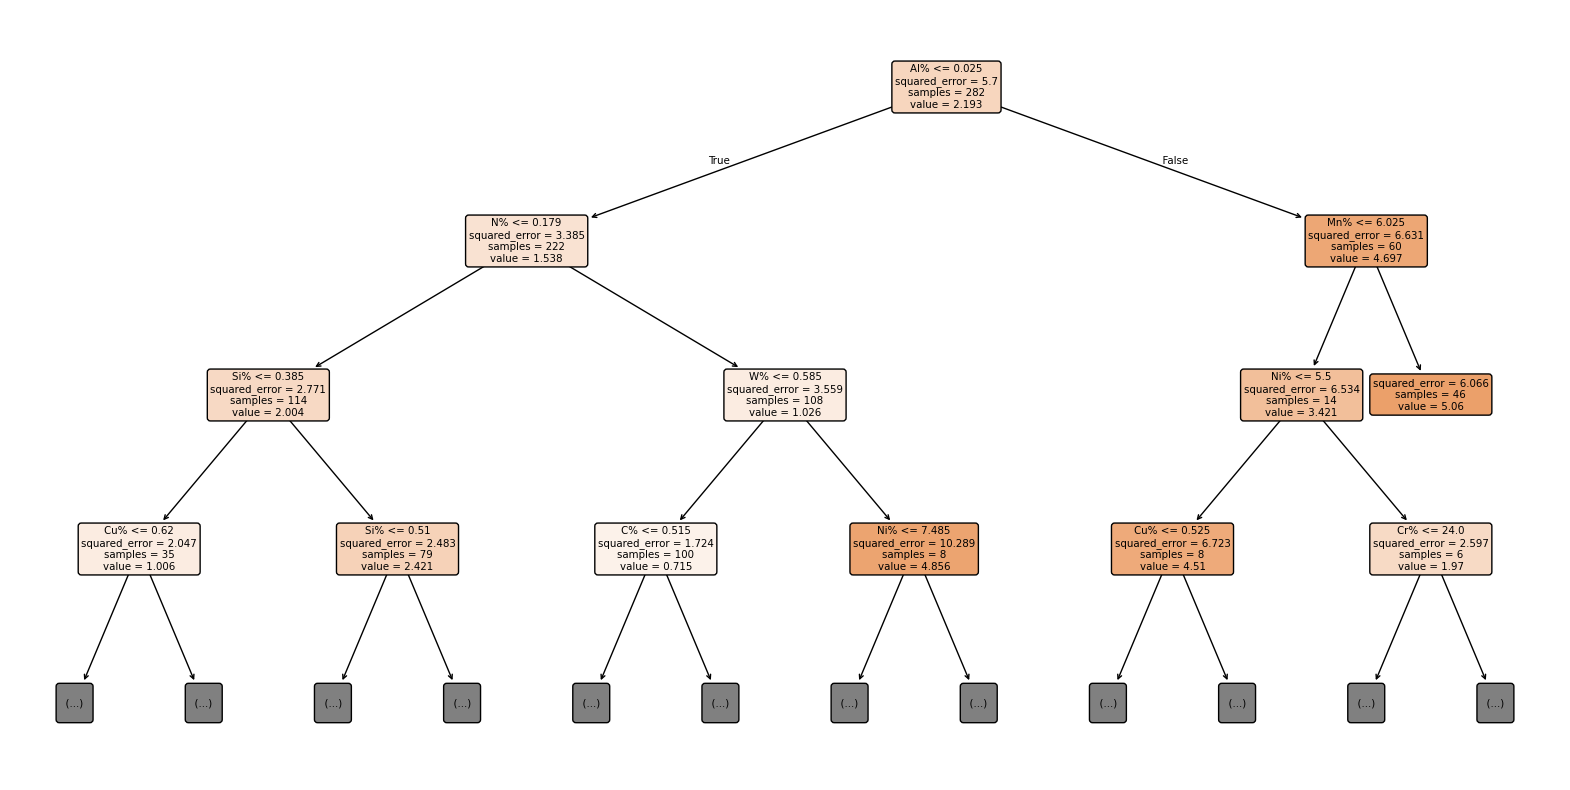

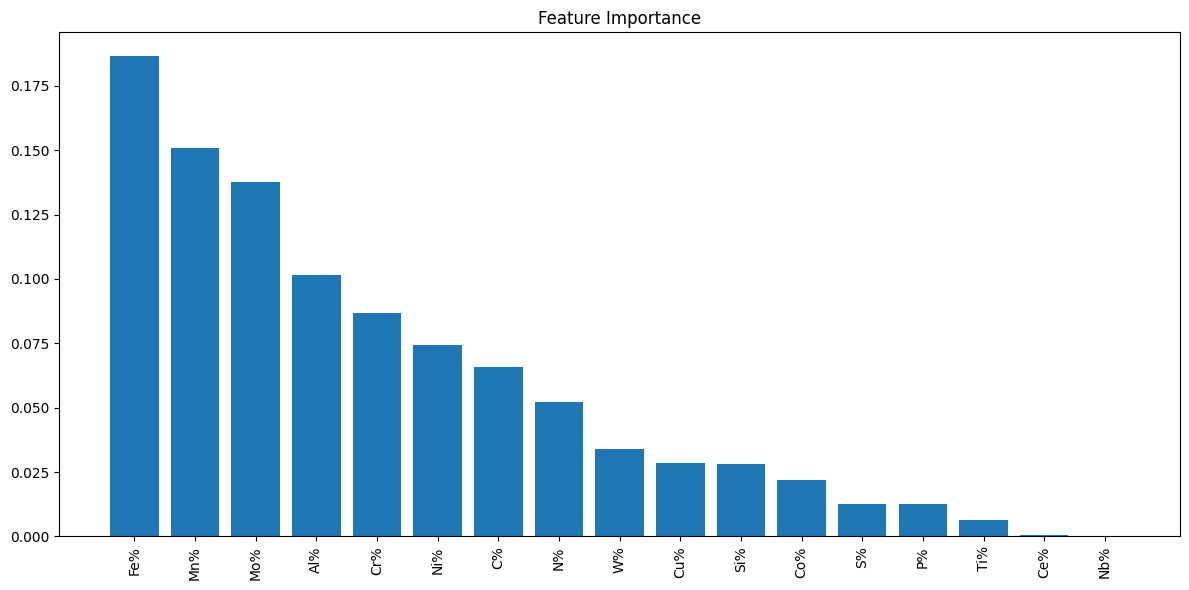

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Use the best model obtained from GridSearchCV (best_model)
# a) Plot a single decision tree from the forest
plt.figure(figsize=(20, 10))
plot_tree(
    best_model.estimators_[2],  # Access the estimators using 'estimators_' from best_model
    feature_names=X_train.columns,
    class_names=["No Sigma Phase", "Sigma Phase"],
    filled=True,
    rounded=True,
    max_depth=3,
)
plt.show()

# b) Feature Importance Plot
# Use feature importances from best_model
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

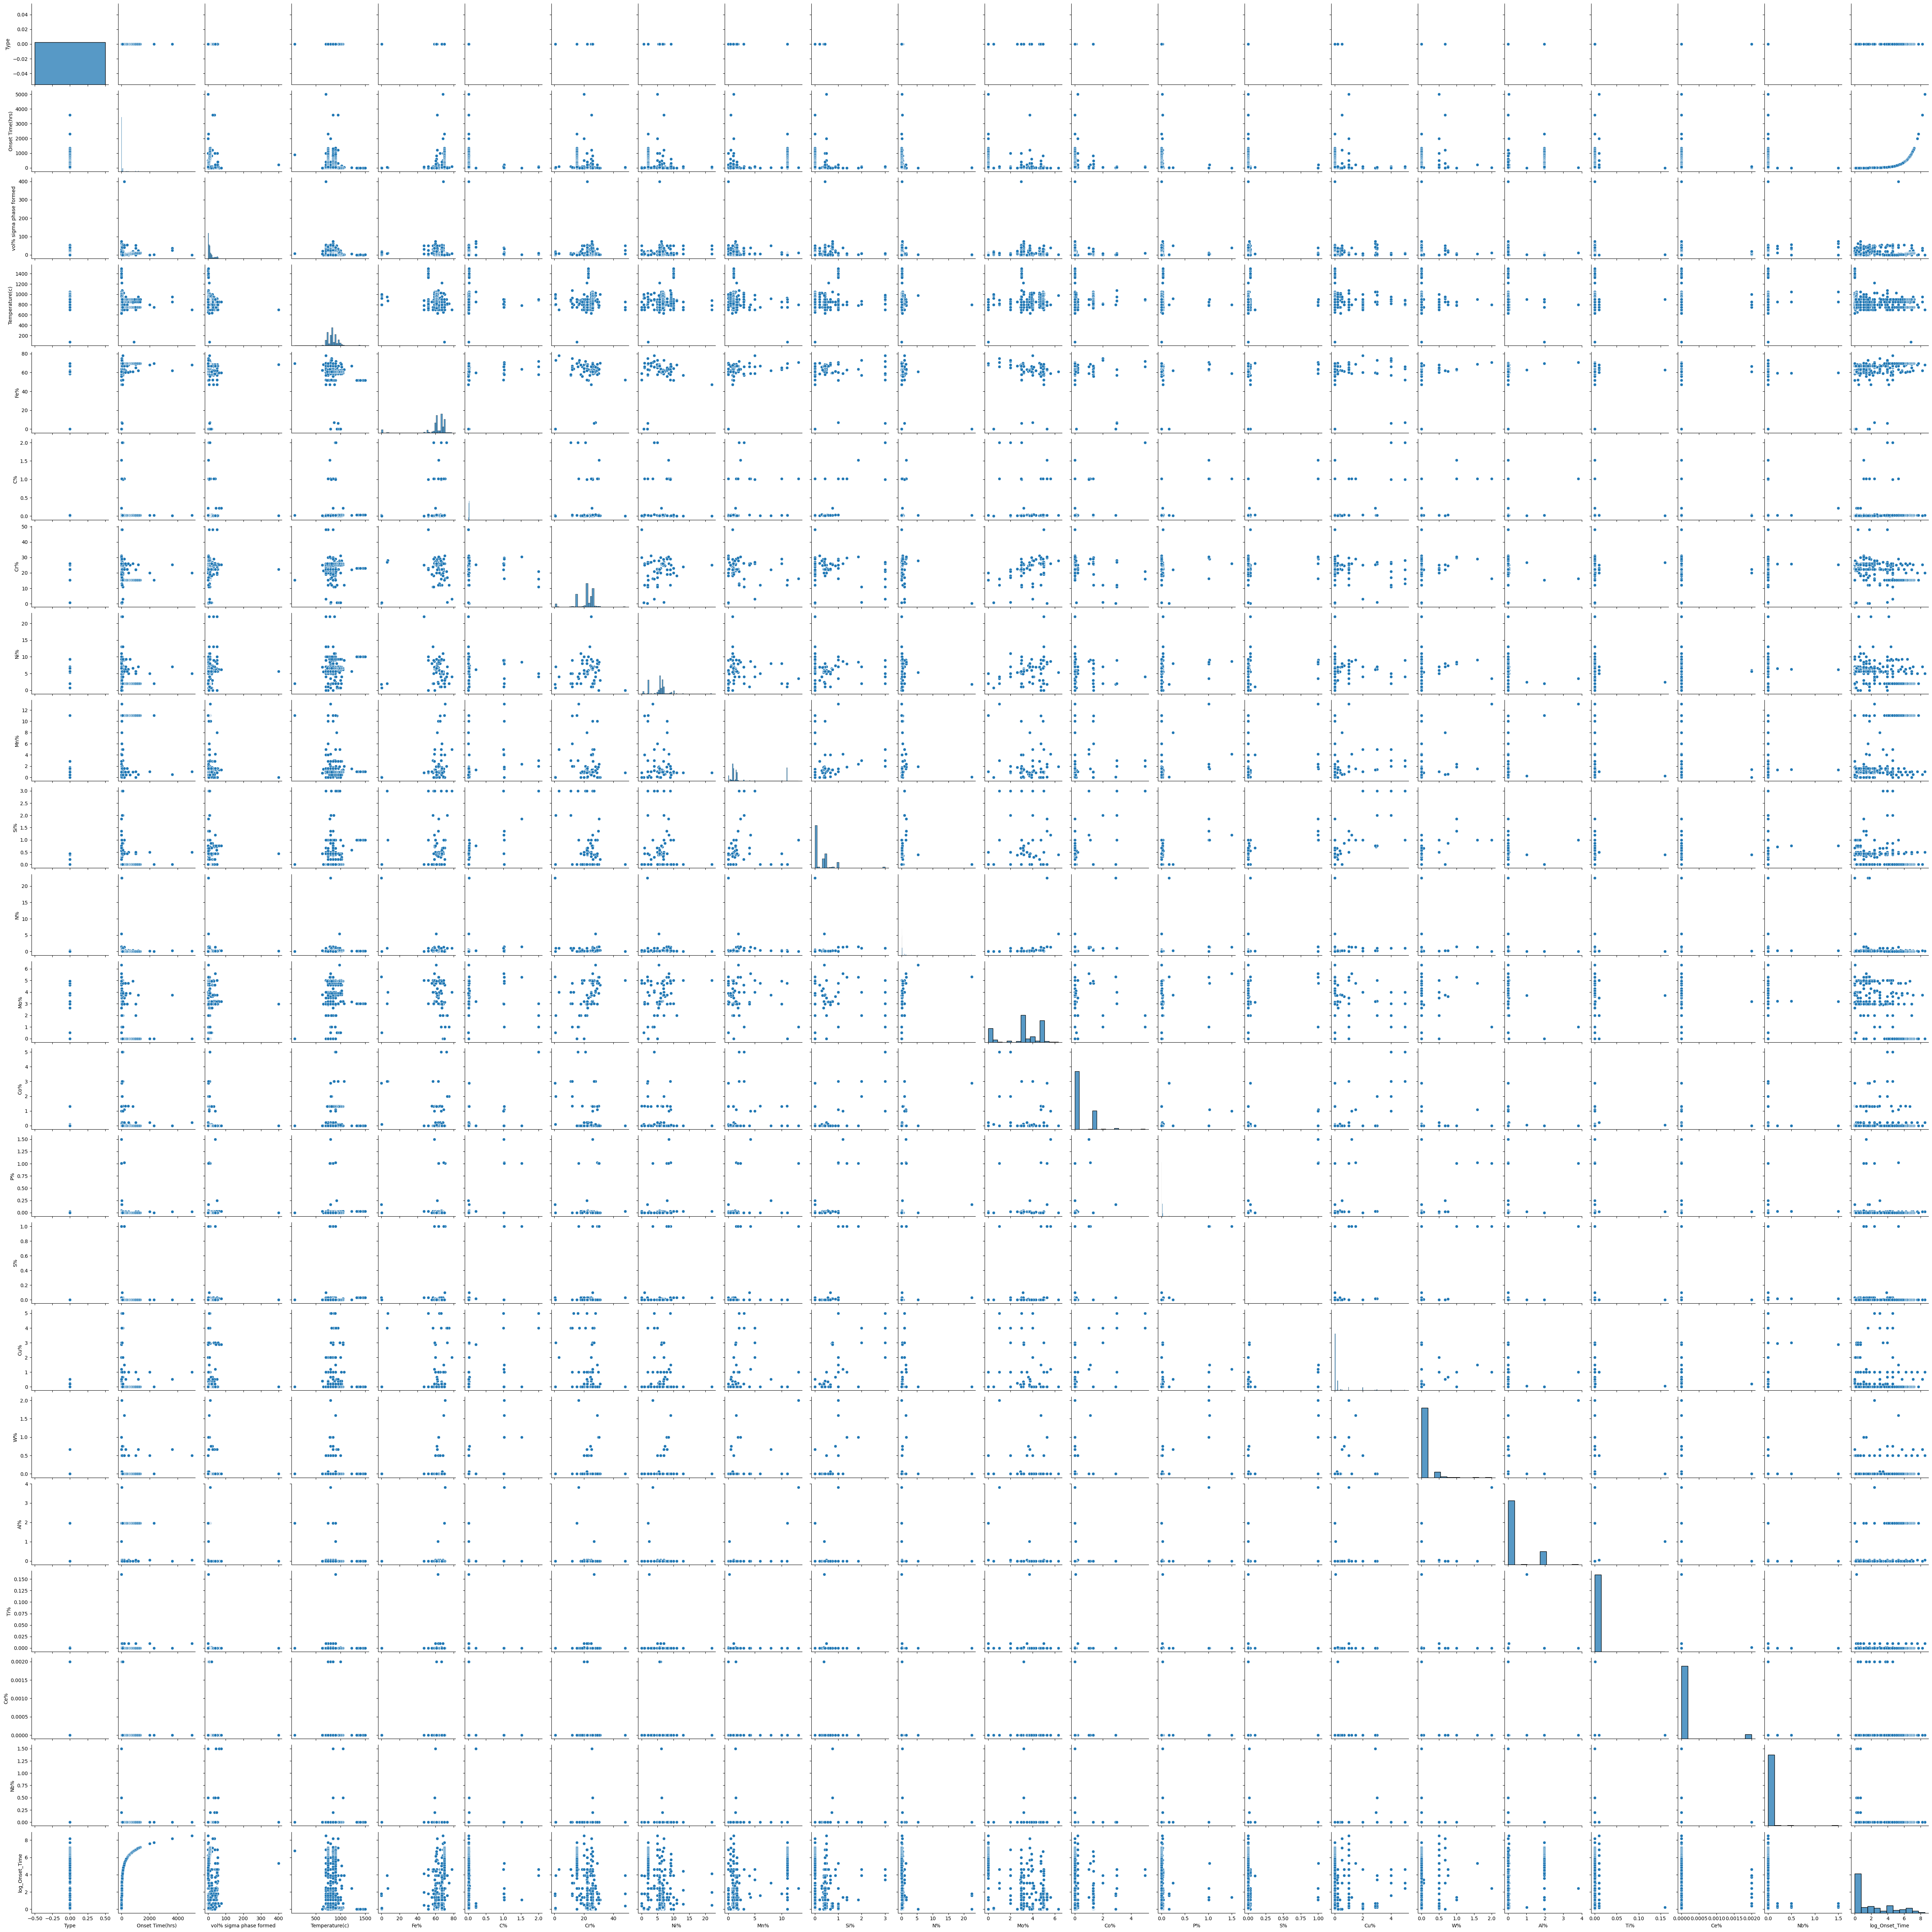

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the pair plot
sns.pairplot(data)
plt.show()

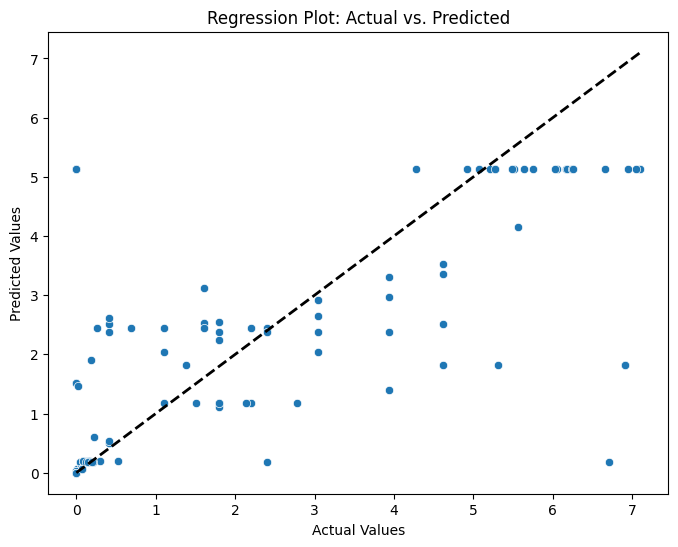

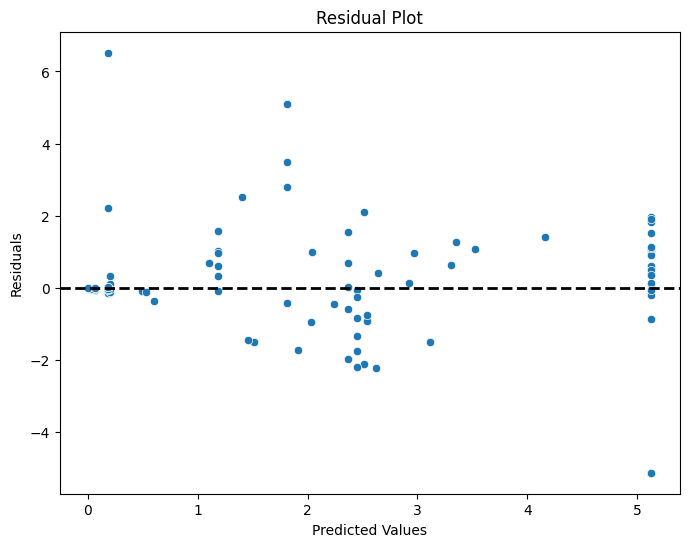

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained your model (model_rf) and made predictions (y_pred) on your test data (X_test, y_test)

# 1. Scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot: Actual vs. Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Add a diagonal line
plt.show()

# 2. Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='k', linestyle='--', lw=2)  # Add a horizontal line at 0
plt.show()

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ... (Your data loading and preprocessing code) ...

# Use the best_model instead of model_rf
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature indices by importance

# Define feature subsets
feature_subsets = {
    4: X.columns[indices[:4]].tolist(),  # Top 4 features
    8: X.columns[indices[:8]].tolist(),  # Top 8 features
    10: X.columns[indices[:10]].tolist(), # Top 10 features
    12: X.columns[indices[:12]].tolist(),
    6: X.columns[indices[:6]].tolist(),
    14: X.columns[indices[:14]].tolist(),
    17: X.columns[indices[:17]].tolist()   # Top 6 features
}

# Train and evaluate models for each feature subset
for num_features, features in feature_subsets.items():
    print(f"\nTraining model with {num_features} features:")

    # Split data with selected features
    X_train_subset, X_test_subset, y_train, y_test = train_test_split(
        X[features], y_1, test_size=0.2, random_state=42
    )

    # Initialize and train the model
    model_rf_subset = RandomForestRegressor(random_state=42)
    model_rf_subset.fit(X_train_subset, y_train)

    # Make predictions
    y_pred_subset = model_rf_subset.predict(X_test_subset)

    # Evaluate performance
    mse = mean_squared_error(y_test, y_pred_subset)
    r2 = r2_score(y_test, y_pred_subset)

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")


Training model with 4 features:
Mean Squared Error: 3.508729718971136
R-squared: 0.38261763240742597

Training model with 8 features:
Mean Squared Error: 3.203733439653305
R-squared: 0.4362835856480146

Training model with 10 features:
Mean Squared Error: 3.2197411883541958
R-squared: 0.43346692475237836

Training model with 12 features:
Mean Squared Error: 3.192863083626654
R-squared: 0.43819629100802615

Training model with 6 features:
Mean Squared Error: 3.213346562631093
R-squared: 0.43459209810142596

Training model with 14 features:
Mean Squared Error: 3.2082579595399743
R-squared: 0.4354874688126972

Training model with 17 features:
Mean Squared Error: 3.164368706969712
R-squared: 0.4432100501552243


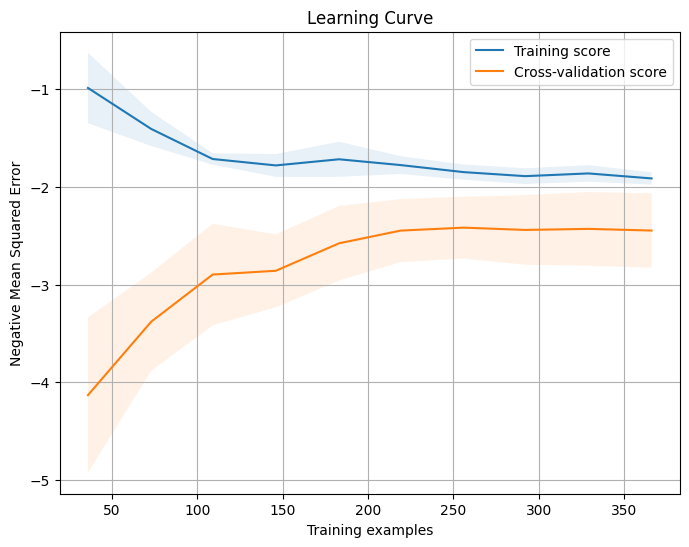

In [51]:
# prompt: learning curve of basic model

# Assuming 'best_model' and 'X_train', 'y_train', 'X_test', 'y_test' are defined as in the original code.
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=basic_rf,  # Use the best_model
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 data points for the x-axis
    cv=5,
    scoring='neg_mean_squared_error',  # Use MSE as the scoring metric
    n_jobs=-1  # Use all available processors
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training examples')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
# prompt: for same x as feature and y_1 as target use xg boost and give r2 score

!pip install xgboost

import xgboost as xgb
from sklearn.metrics import r2_score

# Assuming X and y_1 are already defined as in your provided code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_1, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")


R-squared score: 0.4204339205109767


In [44]:
# prompt: adaboost for x as feature and y_1 as target

from sklearn.ensemble import AdaBoostRegressor

# Assuming X and y_1 are defined as in your previous code

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_1, test_size=0.2, random_state=42)

# Initialize and train the AdaBoostRegressor model
ada_model = AdaBoostRegressor(random_state=42)  # You can adjust hyperparameters here
ada_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 3.4871966859168704
R-squared: 0.3864065007424854


In [45]:
# prompt: use rnn and lstm for the same x as feature and y_1 as target

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN

# Assuming X and y_1 are already defined and preprocessed
# ... (Your data loading and preprocessing code) ...

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_1, test_size=0.2, random_state=42)

# Reshape the input data for RNN/LSTM (samples, timesteps, features)
# Assuming each data point is a single timestep
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(Dense(units=1))  # Output layer
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the RNN model
rnn_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the RNN model
rnn_loss = rnn_model.evaluate(X_test, y_test, verbose=0)
print(f"RNN Loss: {rnn_loss}")

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dense(units=1))  # Output layer
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the LSTM model
lstm_loss = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Loss: {lstm_loss}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 9.2964
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.0496
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.9757
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.8225
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.7943
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.9506
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.9931
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.1138
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.7647
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.5540
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1278
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.9841
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2805
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.9872
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 9.6815
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6335  
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4863 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1535 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4210  
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3266 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.3604 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9721 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.2156 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.3614 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8117
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7889 
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6025
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.7960 
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.3549 
Ep

In [46]:
# prompt: r2 score for rnn_model and lstm_model

# Make predictions using the trained RNN and LSTM models
rnn_predictions = rnn_model.predict(X_test)
lstm_predictions = lstm_model.predict(X_test)

# Calculate the R-squared scores for RNN and LSTM models
rnn_r2 = r2_score(y_test, rnn_predictions)
lstm_r2 = r2_score(y_test, lstm_predictions)

print(f"RNN R-squared: {rnn_r2}")
print(f"LSTM R-squared: {lstm_r2}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step
RNN R-squared: 0.3582964924722156
LSTM R-squared: 0.32112673360767174


In [47]:
# prompt: svm model as y_1 as target and x as feature

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X and y_1 are defined as in your previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_1, test_size=0.2, random_state=42)

# Initialize and train the SVR model
svr_model = SVR() # You can adjust hyperparameters like kernel, C, epsilon, etc.
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 4.06785486575528
R-squared: 0.2842361569019939
